# Importing Libraries

In [130]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Data Exploration

In [132]:
# Import Data of World Happnies
df = pd.read_csv('world-happiness-report.csv')

In [134]:
pd.options.display.max_columns=100 # to see columns 
df.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [76]:
# Columns names
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [77]:
# Numbers of rows and columns of the data frame
df.shape

(1949, 11)

In [135]:
# Changing the columns name
df = df.rename(columns={'Country name': 'country', 
                            'Life Ladder': 'life_lad',
                           'Log GDP per capita': 'loggdp',
                           'Social support': 'soci_supp',
                           'Healthy life expectancy at birth': 'life_exp',
                           'Freedom to make life choices': 'freedom',
                           'Generosity': 'generous',
                           'Perceptions of corruption': 'corrup_percent',
                           'Positive affect': 'pos_aff',
                           'Negative affect': 'neg_aff'})

df.columns

Index(['country', 'year', 'life_lad', 'loggdp', 'soci_supp', 'life_exp',
       'freedom', 'generous', 'corrup_percent', 'pos_aff', 'neg_aff'],
      dtype='object')

In [79]:
# Infomration about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
country           1949 non-null object
year              1949 non-null int64
life_lad          1949 non-null float64
loggdp            1913 non-null float64
soci_supp         1936 non-null float64
life_exp          1894 non-null float64
freedom           1917 non-null float64
generous          1860 non-null float64
corrup_percent    1839 non-null float64
pos_aff           1927 non-null float64
neg_aff           1933 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [80]:
# Take a glimpse at descrptive statistics
df.describe()

,year,life_lad,loggdp,soci_supp,life_exp,freedom,generous,corrup_percent,pos_aff,neg_aff
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [81]:
df.nunique()

country            166
year                16
life_lad          1553
loggdp            1500
soci_supp          455
life_exp           828
freedom            535
generous           609
corrup_percent     572
pos_aff            431
neg_aff            374
dtype: int64

In [82]:
# Check the NaN data
df.isnull().sum()

country             0
year                0
life_lad            0
loggdp             36
soci_supp          13
life_exp           55
freedom            32
generous           89
corrup_percent    110
pos_aff            22
neg_aff            16
dtype: int64

In [83]:
# Included years in the dataset

year_list = df.year.unique()
year_list = year_list.tolist()
year_list.sort()
year_list

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [70]:
# Mean of the Life Ladder Index during 2005-2020

mean_life_ladder = []

for i in year_list:
    mask = (df['year'] == i)
    mean_life_lad = df.loc[mask, 'life_lad'].mean()
    mean_life_ladder.append((mean_life_lad))

print(mean_life_ladder)

[6.44625925925926, 5.196898876404495, 5.418274509803923, 5.418509090909089, 5.457666666666666, 5.496806451612903, 5.424082191780824, 5.44375352112676, 5.39456204379562, 5.389020689655174, 5.404034965034964, 5.399478873239441, 5.460408163265307, 5.499443661971831, 5.570868055555557, 5.840599999999998]


#### Question1: What is the trend of the life ladder index from 2005 to 2020?

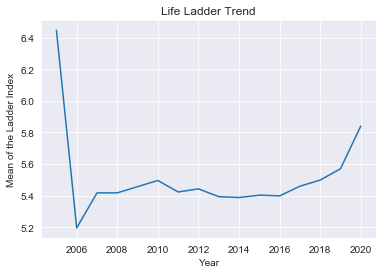

In [87]:
# Trend of the Life Ladder Index

df_1 = pd.DataFrame({'mean_ladder': mean_life_ladder})
sns.set_style('darkgrid')
sns.lineplot(data = df_1, x=range(2005,2021), y=df_1['mean_ladder']) # We have had outlier in year 2005
plt.xlabel('Year')
plt.ylabel('Mean of the Ladder Index')
plt.title('Life Ladder Trend')
backgrounds = sns.plotting_context()


In [129]:
# Maximum Life Ladder

max_life_ladder = df.loc[df['life_lad'].idxmax()]
print(max_life_ladder) # Denmark has the highest index of Happiness in 2008

country           Denmark
year                 2008
life_lad            7.971
loggdp              10.88
soci_supp           0.954
life_exp            70.08
freedom              0.97
generous            0.272
corrup_percent      0.248
pos_aff             0.757
neg_aff             0.163
Name: 451, dtype: object


#### Question2: How is the  joint distribution of Log GDP per capita and Life Ladder?

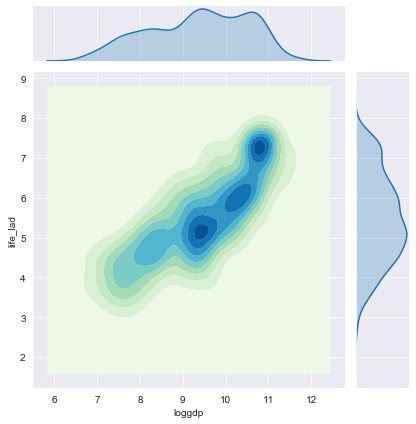

In [92]:
# Joint distribution of Log GDP per capita and Life Ladder

sns.set_style('darkgrid')
sns.jointplot(data=df, x=df.loggdp, y=df.life_lad, kind='kde', shape = True, cmap = 'GnBu')

#### Question3: How is the correlation between variables based on visualization?

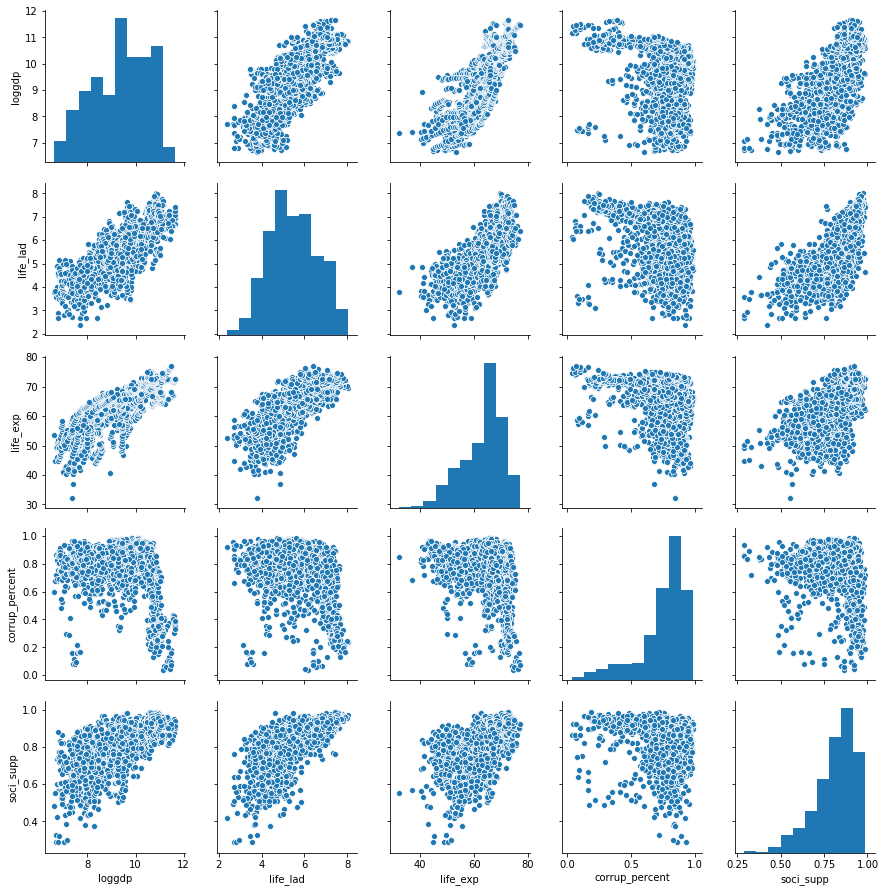

In [326]:
sns.pairplot(df,
             x_vars=['loggdp','life_lad','life_exp','corrup_percent','soci_supp'],
             y_vars=['loggdp','life_lad','life_exp','corrup_percent','soci_supp'])

#### How is the correlation between variables in the Heatmap?

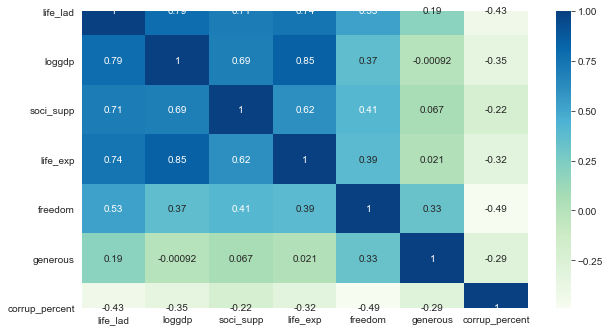

In [112]:
fig, ax = plt.subplots(figsize=(10, 5))

# Drop the 'year' column from the DataFrame
df_correlation = df.drop(['year','pos_aff','neg_aff'], axis=1)

# Create the heatmap
sns.heatmap(df_correlation.corr(), annot=True, cmap='GnBu', ax=ax)
plt.subplots_adjust(top=0.95)
# Show the plot
plt.show()

In [123]:
# The World mape of Happiness

fig = px.choropleth(
    data_frame=df[df['year'] == 2020],
    locations='country',
    locationmode='country names',
    color='life_lad',
    color_continuous_scale='GnBu',
    range_color=(0, 10),
    title='Happiness Scores by Country in 2020'

)

fig.update_layout(
    coloraxis_colorbar=dict(
        title="Happiness SCores"
    )
)

fig.show() # Some countries don't have data, such as Pakistan and Afghanistan, which are not depicted.

Text(0.5, 1.0, 'Happiness Scores Average by Country (2005-2020)')

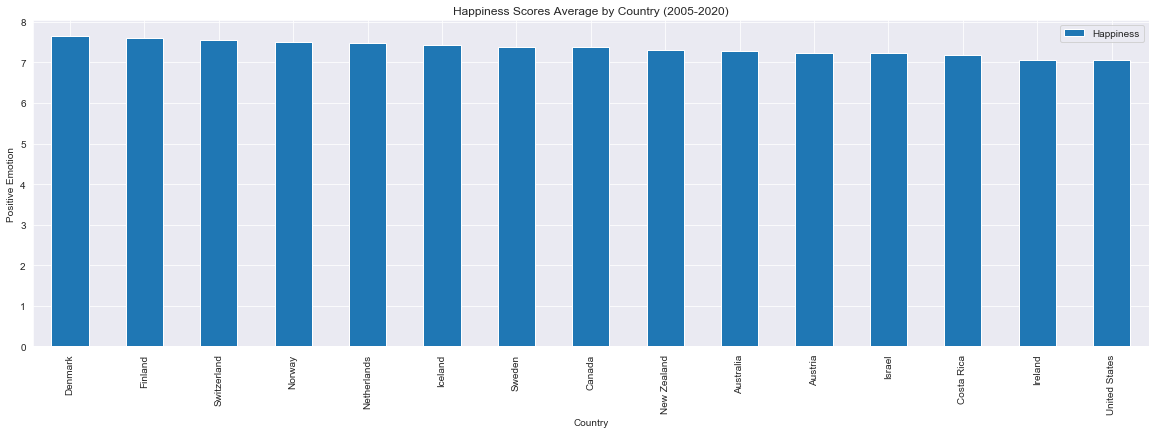

In [126]:
positive_emotion_avg = df[ ['country', 'life_lad'] ] \
                    .groupby('country') \
                    .mean() \
                    .sort_values('life_lad', ascending=False) \
                    .head(15) \
                    .rename(columns={'life_lad': 'Happiness'})

positive_emotion_avg.plot(kind='bar', figsize=(20, 6))

plt.ylabel('Positive Emotion')
plt.xlabel('Country')
plt.title('Happiness Scores Average by Country (2005-2020)')

In [497]:
df = df.dropna()
result = df.groupby('year').mean()
result

,life_lad,loggdp,soci_supp,life_exp,freedom,generous,corrup_percent,pos_aff,neg_aff
year,,,,,,,,,
2005,7.418000,10.652000,0.962000,71.300000,0.957000,0.256000,0.503000,0.839000,0.233000
2006,5.199649,9.074108,0.835743,59.963243,0.727797,0.000473,0.760635,0.718554,0.256324
2007,5.385755,9.152660,0.808936,61.188426,0.686330,0.011574,0.795926,0.706649,0.248415
2008,5.444089,9.151436,0.782485,61.156584,0.684317,0.025772,0.767931,0.706059,0.242624
2009,5.455274,9.255670,0.815726,62.288123,0.683623,-0.011434,0.770292,0.703698,0.250821
2010,5.509152,9.377589,0.830830,62.954036,0.706732,0.001696,0.765920,0.712125,0.242607
2011,5.374439,9.202992,0.798462,61.961735,0.727235,-0.016492,0.762364,0.699265,0.252076
2012,5.411504,9.307917,0.807207,62.927694,0.703719,-0.004182,0.766306,0.706107,0.260860
2013,5.346629,9.316798,0.804508,63.171629,0.727734,0.000637,0.764097,0.712202,0.268984


# Data Cleaning

In [390]:
# Checking NAN Values
print(df.isnull().sum()) # We have a lot of missing values!

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64


In [118]:
# Drop NAN Values from Our Data Frame
df = df.dropna()
print(df.isnull().sum()) # There is no NAN, so we can use numeric methods and models.

country           0
year              0
life_lad          0
loggdp            0
soci_supp         0
life_exp          0
freedom           0
generous          0
corrup_percent    0
pos_aff           0
neg_aff           0
dtype: int64


# OLS Method

#### Is there any statistically significant realtionship between Log GDP per capita and Life Ladder in 2020?

In [119]:
# Independent and Dependent Variable
x = df[['loggdp', 'freedom', 'corrup_percent']]
y = df.life_lad

# Add Constant to the Independt Variable
x = sm.add_constant(x)

# Fit the Model with the OLS Method
model = sm.OLS(y, x).fit()

# Pooled OLS Regression Results
print(model.summary()) # P-values are less than Type I error, so the coefficients are statistically significant.
                       # The signs of coefficients also make sense, but we can fit more precisely with checking assumptions.

                            OLS Regression Results                            
Dep. Variable:               life_lad   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     1355.
Date:                Sun, 14 May 2023   Prob (F-statistic):               0.00
Time:                        19:44:41   Log-Likelihood:                -1600.4
No. Observations:                1708   AIC:                             3209.
Df Residuals:                    1704   BIC:                             3231.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.6601      0.186     -8.